# TELCO CHURN RATE PREDICTION

The aim of this project is to study and predict the churn rate in the Telco Sector.

The Dataset comes from https://www.kaggle.com/datasets/blastchar/telco-customer-churn?datasetId=13996&sortBy=voteCount

But, first of all, what is the <b>churn rate</b>?

The churn rate, when applied to a customer base, refers to the proportion of contractual customers or subscribers who leave a supplier during a given time period. It is a possible indicator of customer dissatisfaction, cheaper and/or better offers from the competition, more successful sales and/or marketing by the competition, or reasons having to do with the customer life cycle.

Churn analysis is a predictive analysis that makes it possible to identify customers who are more likely to switch to competitors, in order to intervene in advance and avoid their migration.

## 1) IMPORT THE DATASET

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math

In [144]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", sep="\t")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [145]:
df.shape

(7043, 21)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have 7,043 observations with 20 variables. Excluding CustomerID, at the end we have 1 target variable (Churn) and 18 predictors.

Note that TotalCharges, which should have been numerical, is instead categorical. I need to convert it to the right data format.

In [147]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce")

## 2) CHECK FOR NULL VALUES

In [148]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have only 11 missing values for total charges, they are a tiny portion of the 7043 entries. 

Let's visualize the rows with missing values in order to understand if there is a reason behind them

In [149]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


I don't observe any particular reason behind the missing values, so, considering that there are only 11 observations out of 7,043, i remove the NaNs.

In [150]:
df.dropna(inplace=True)

## 3) EXPLORATIVE DATA ANALYSIS

Firstly, I analyse the Y variable (churn), and then all the others variables

#### 3.1) ANALYSIS OF THE TARGET VARIABLES

In [151]:
df.Churn.value_counts()/len(df)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

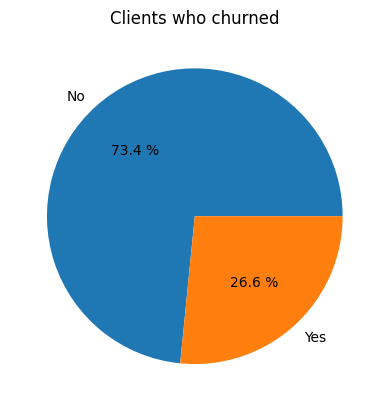

In [152]:
plt.pie(df.Churn.value_counts()/len(df), labels=df.Churn.unique(), autopct="%1.1f %%")
plt.title("Clients who churned");

So, we can see that we have a proportion of 3:1 for clients who have not churned in respect to people who churned. This frequencies can lead to imbalanced data, let's consider this for the future models.

#### 3.2) ANALYSIS OF THE PREDICTORS and RELATIONSHIP WITH THE TARGET

It makes sense to study the variables like this:
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [153]:
col_names = df.columns
col_names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<b><i>Demographic Informations

In [154]:
demographic_vars = ["gender", "SeniorCitizen", "Partner", "Dependents"]

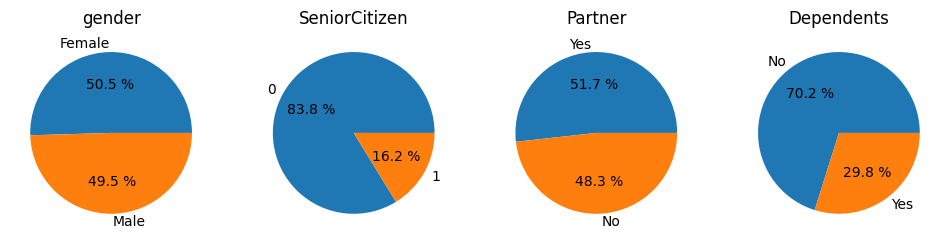

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,4), sharey=True)
ax = ax.ravel()

for col,i in zip(range(len(demographic_vars)), range(4)):
        ax[i].pie(df[demographic_vars[col]].value_counts()/len(df), 
                        labels=df[demographic_vars[col]].unique(),  autopct="%1.1f %%")
        ax[i].set_title(demographic_vars[col]);

From here we can see that:
- for Gender and Partner, our dataset is essentially balanced
- we have only 16% of SeniorCitizen: this means that a lot of clients are "young", based on the classification of the company
- 70% of the clients doesn't have any dependents.

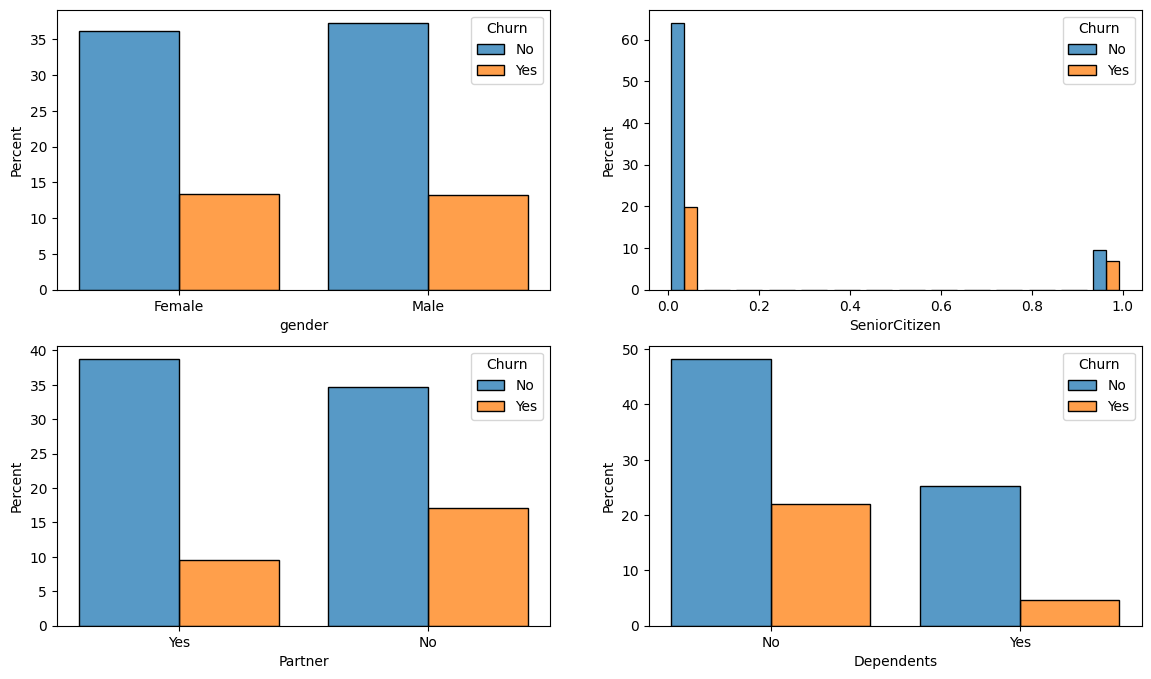

In [156]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
ax = ax.ravel()
#len - 1 perché churn l'ho fatto a parte
for col,i in zip(range(len(demographic_vars)), range(4)):
        sns.histplot(ax= ax[i], x= df[demographic_vars[col]], hue=df["Churn"], 
                     stat="percent",multiple="dodge", shrink=.8);

In [157]:
for col in range(len(demographic_vars)):
    print(pd.crosstab(index=df[demographic_vars[col]], columns=df["Churn"], normalize="index"))

Churn         No       Yes
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046
Churn                No       Yes
SeniorCitizen                    
0              0.763497  0.236503
1              0.583187  0.416813
Churn          No       Yes
Partner                    
No       0.670239  0.329761
Yes      0.802829  0.197171
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.844688  0.155312


To sum up:
- gender doesn't seem to have an impact on churn, given that the percentage of clients that left is equal for female and male.
- Interesting to note that old clients leave more than young one (42% churned vs 24%). So, it seems that old people are more prone to leave.
- having a partner or a dependent decreases the churn rate (for partner frequency from 33% to 20%, for dependents it halves the possibility of churning, from 31% to 15%)

<b><i> Services Customers have signed up for

In [158]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [159]:
services_cols = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", 
                 "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
len(services_cols)

9

We have 9 variables to analyse.

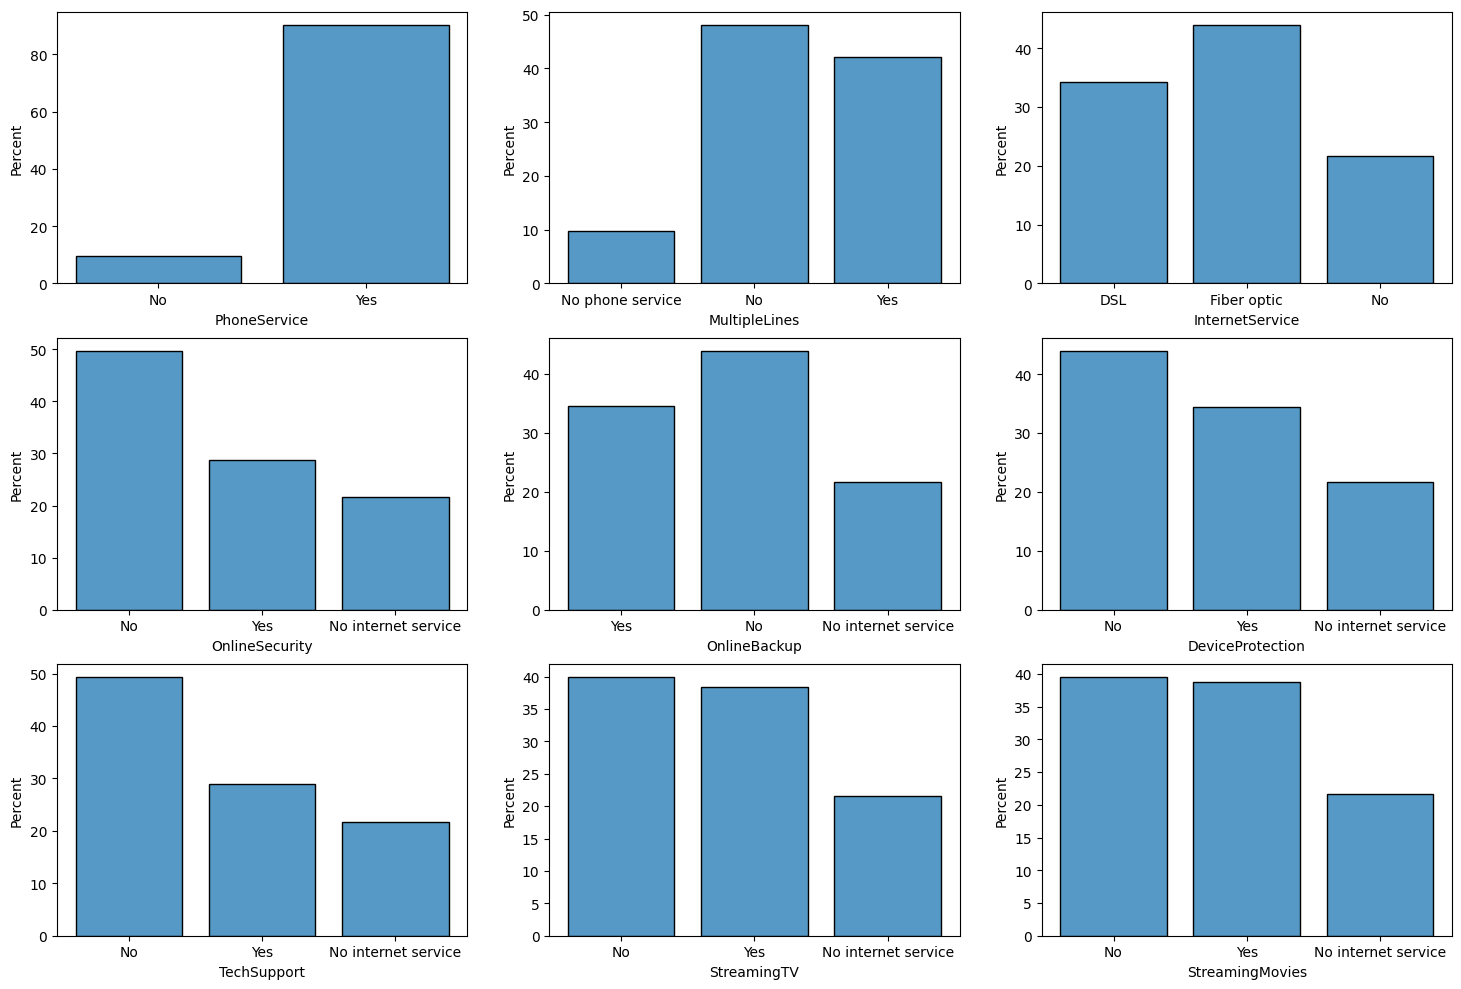

In [160]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,12))
ax = ax.ravel()
#len - 1 perché churn l'ho fatto a parte
for col,i in zip(range(len(services_cols)), range(9)):
        sns.histplot(ax= ax[i], x= df[services_cols[col]], stat="percent", 
                     multiple="dodge", shrink=.8);

Comment:
- Majority of the people (over 80%) has a phone
- Interesting that 20% of the clients have no internet service.
- circa equally proportion of clients who have and have not signed up for streaming Tv and streaming Movies.
- Regarding InternetService, the majority have Fiberoptic (40%), while a 30% of people have DSL.
- for security services, we can see that only a small size (30% of total circa fo each variable) of clients have signed up.

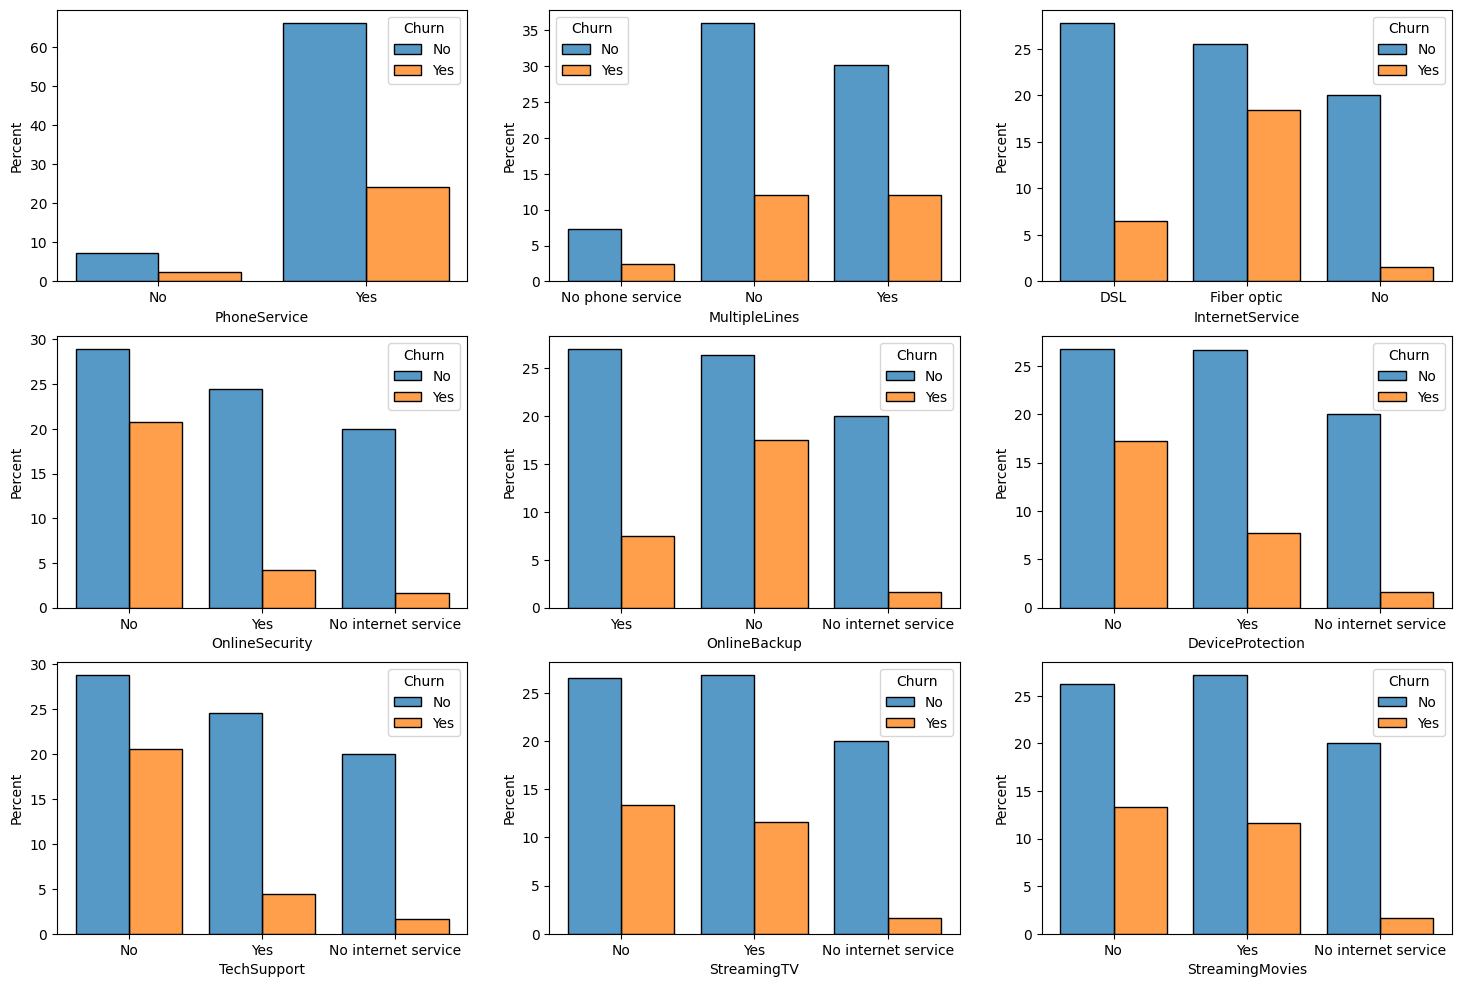

In [161]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,12))
ax = ax.ravel()
for col,i in zip(range(len(services_cols)), range(9)):
        sns.histplot(ax= ax[i], x= df[services_cols[col]], hue=df["Churn"], stat="percent", 
                     multiple="dodge", shrink=.8);

In [162]:
for col in range(len(services_cols)):
    print(pd.crosstab(index=df[services_cols[col]], columns=df["Churn"], normalize="index"))

Churn               No       Yes
PhoneService                    
No            0.750000  0.250000
Yes           0.732525  0.267475
Churn                   No       Yes
MultipleLines                       
No                0.749188  0.250812
No phone service  0.750000  0.250000
Yes               0.713515  0.286485
Churn                  No       Yes
InternetService                    
DSL              0.810017  0.189983
Fiber optic      0.581072  0.418928
No               0.925658  0.074342
Churn                      No       Yes
OnlineSecurity                         
No                   0.582213  0.417787
No internet service  0.925658  0.074342
Yes                  0.853598  0.146402
Churn                      No       Yes
OnlineBackup                           
No                   0.600583  0.399417
No internet service  0.925658  0.074342
Yes                  0.784330  0.215670
Churn                      No       Yes
DeviceProtection                       
No                   0.

Looking at the relationship between the churn and the services, we can note that (remember that on average is 26% the churn rate, so compare it with this number):
- Considering InternetService, Churn is 19% circa with DSL but it increases drastically (42%) with FiberOptic (there may be some problem with this specific service);
- People who have security service (OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport) are less prone to churn in respect to people who don't have this features
- Having or not MultipleLines or Streaming Services doesn't seem to impact the churn rate (similar value for who has the service and who hasn't the service).

<b><i>Customer Account Information

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [164]:
cust_acc_cols = ["PaperlessBilling", "PaymentMethod", "Contract", "MonthlyCharges", "TotalCharges", "tenure"]

PaperlessBilling and PaymentMethod are categoric, all the other variables are numeric.

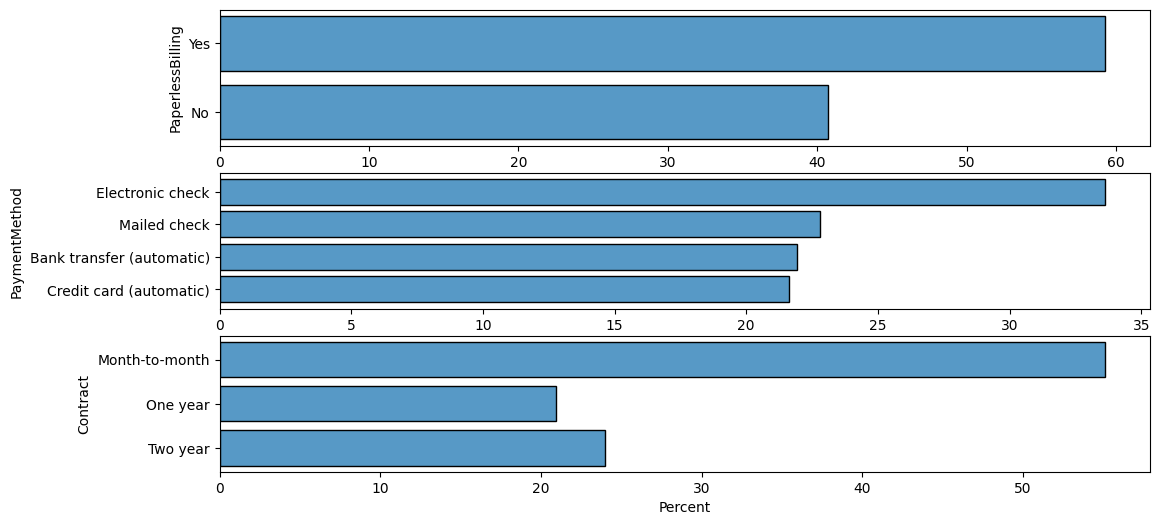

In [165]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,6))
#take the categorical columns
ax.ravel()
cols = ["PaperlessBilling", "PaymentMethod", "Contract"]
for i in range(len(cols)):
    sns.histplot(ax=ax[i], data = df, y= df[cols[i]], stat="percent", 
                 multiple="dodge", shrink=0.8);

From here we can see that:
- Majority of the clients prefer PaperlessBilling (60% circa vs 40%)
- for the Payment Methods, we have that the most preferred is electronic Check, the others have circa the same frequency.
- Then, majority of people have month to month contract (more than 50%)

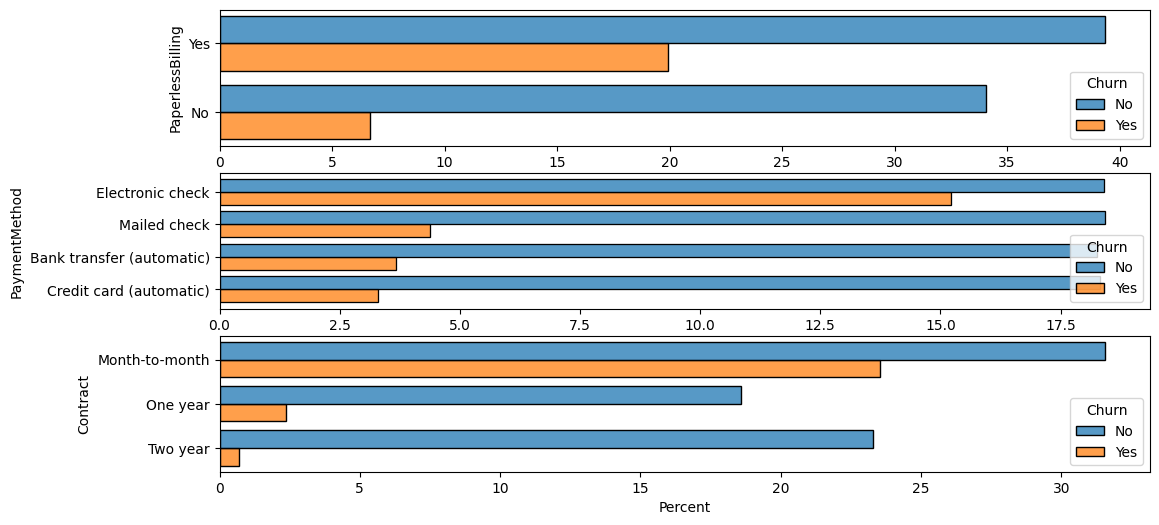

In [166]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,6))
#take the categorical columns
ax.ravel()
cols = ["PaperlessBilling", "PaymentMethod", "Contract"]
for i in range(len(cols)):
    sns.histplot(ax=ax[i], data = df, y= df[cols[i]], stat="percent", 
                 multiple="dodge", shrink=0.8, hue=df["Churn"]);

In [167]:
for col in range(len(cols)):
    print(pd.crosstab(index=df[cols[col]], columns=df["Churn"], normalize="index"))

Churn                   No       Yes
PaperlessBilling                    
No                0.836243  0.163757
Yes               0.664107  0.335893
Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832685  0.167315
Credit card (automatic)    0.847469  0.152531
Electronic check           0.547146  0.452854
Mailed check               0.807980  0.192020
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487


Regarding the relationship with the churn rate:
- People who prefere paperless billing are twice more probable to churn (34% vs 16%)
- for the Payment Methods, we can see that the most probable people to churn are the ones who uses electronic check (45%). Other payments have similar churn rate.
- Month to Month contract are associated with the higher rate of churn (43%). This seems obvious, because the clients with this contract have to renew it each month and so it's easier to exit from the service. Interesting to note that having a Two Year contract drastically reduces the frequency of the churn (just 3%).

Now let's observe the continuos variables.

<b>Tenure

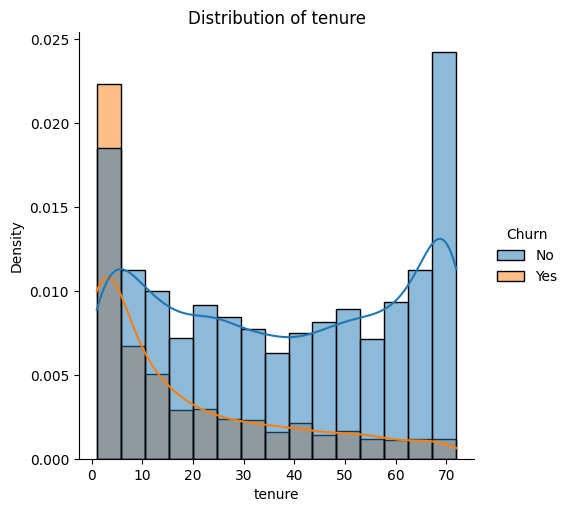

In [168]:
#tenure is the how many previous months the customer has been with the company
sns.displot(data=df, x=df.tenure, hue = df["Churn"],kde=True, stat="density")
plt.title("Distribution of tenure");

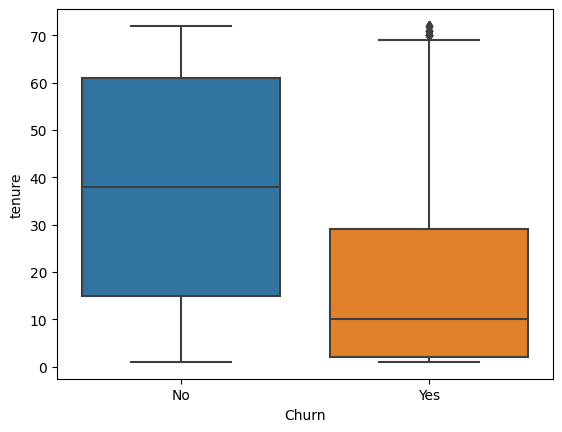

In [169]:
sns.boxplot(x=df.Churn, y = df.tenure);

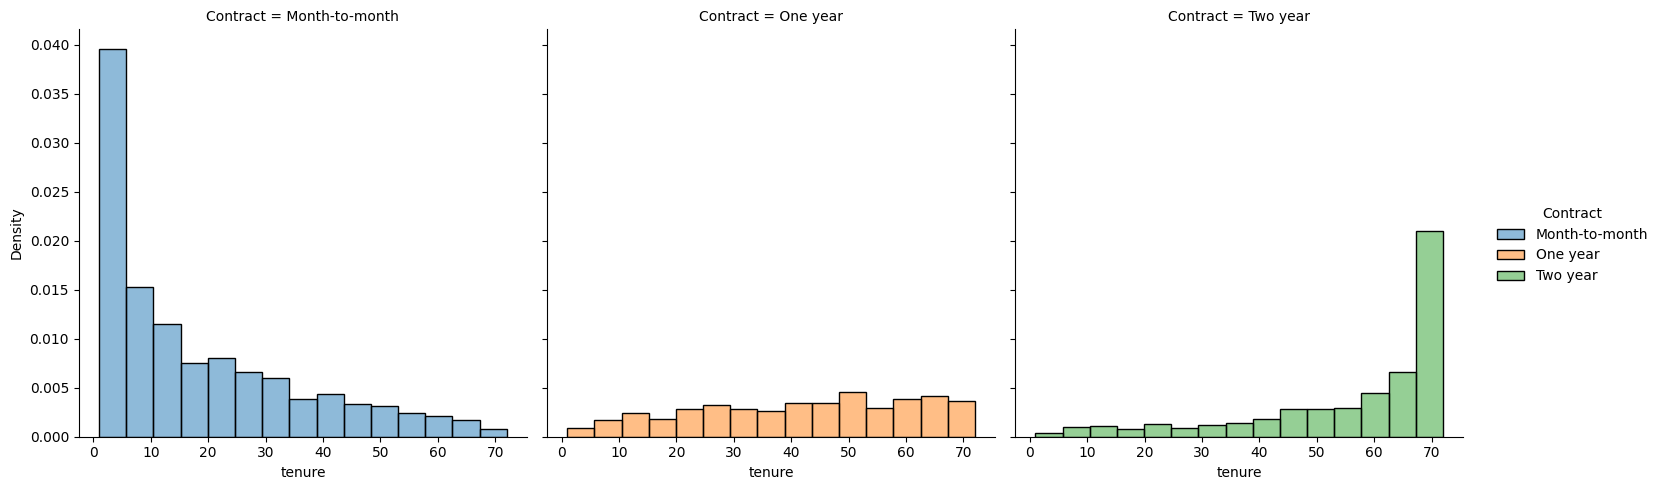

In [170]:
sns.displot(data=df, x=df.tenure, hue=df.Contract, stat="density", col=df.Contract);

From here, we see that people who mostly churned are even the ones who stay less with the services. This confirmes the previous statement on the contracts, and we can even see that clients with month-to-month contract usually have small value of tenure (they usually stay less than 10 months).
<br>For other contracts, we can observe that the quantity of churn decreases as the tenure increases. Interesting to note that with 2 years contracts, the majority of people stays 70 or more months, so this contracts are associated with the most loyal customers.

<b>Charges

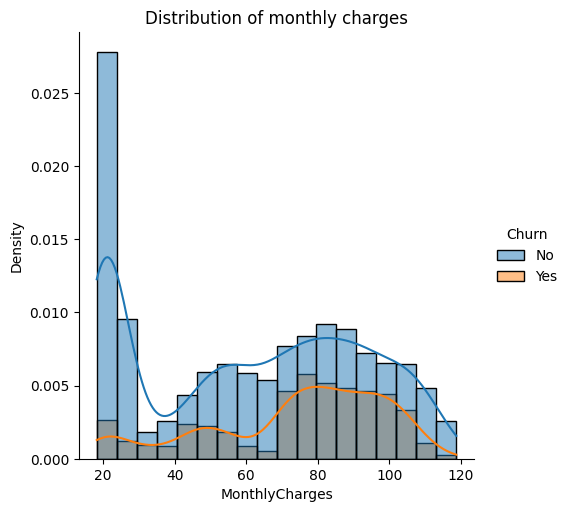

In [171]:
sns.displot(data=df, x= df.MonthlyCharges, kind="hist", hue=df.Churn, kde= True, stat="density")
plt.title("Distribution of monthly charges");

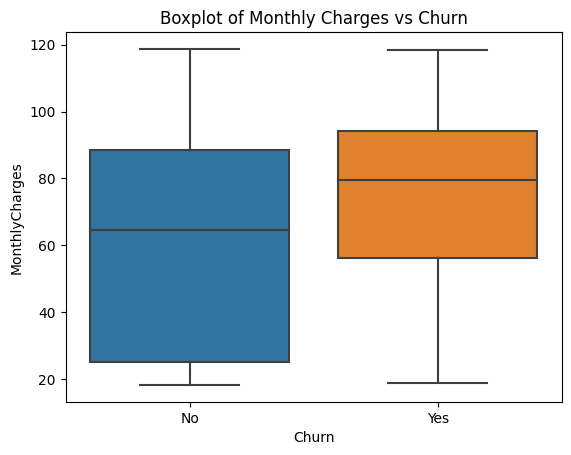

In [172]:
sns.boxplot(x= df.Churn, y= df.MonthlyCharges)
plt.title("Boxplot of Monthly Charges vs Churn");

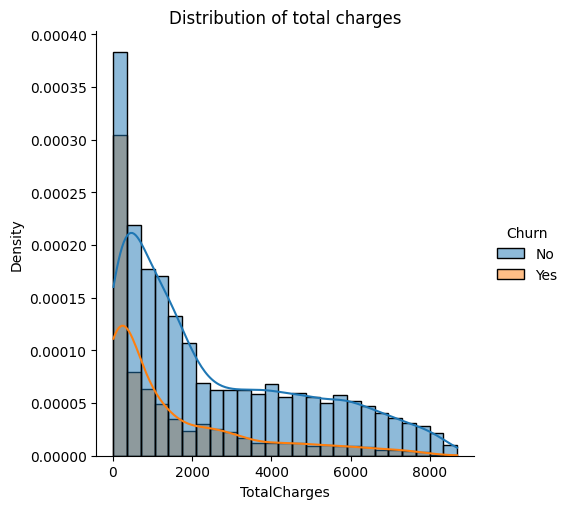

In [173]:
sns.displot(data=df, x= df.TotalCharges, kind="hist", hue=df.Churn, kde=True, stat="density")
plt.title("Distribution of total charges");

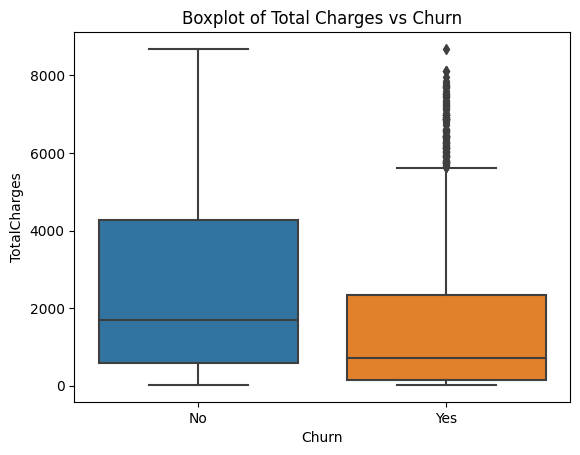

In [174]:
sns.boxplot(x=df.Churn, y = df.TotalCharges)
plt.title("Boxplot of Total Charges vs Churn");

So, when looking at the distribution of monthly and total charges we can note that:
- for Monthly Charges people who have churned have a different distribution from people who didn't, so the month payment can be something of impactful
- People who churn are the ones who have on average higher monthly charges, but lower total charges
- for Total Charges the distributions are circa the same.

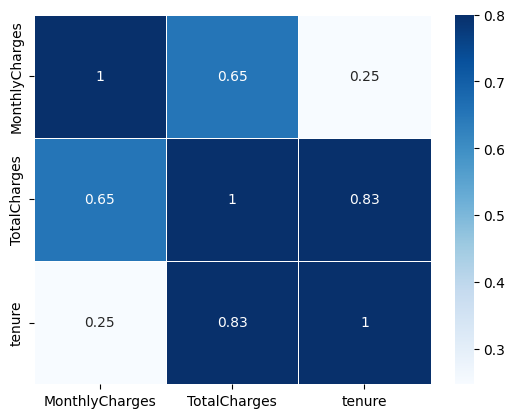

In [175]:
corr_mat = df[["MonthlyCharges", "TotalCharges", "tenure"]].corr()
sns.heatmap(data=corr_mat, annot=True, cmap = "Blues", linewidths=0.5, vmax=0.8);

Excluded the tenure and Monthly charges, all othere values of correlation are pretty high.

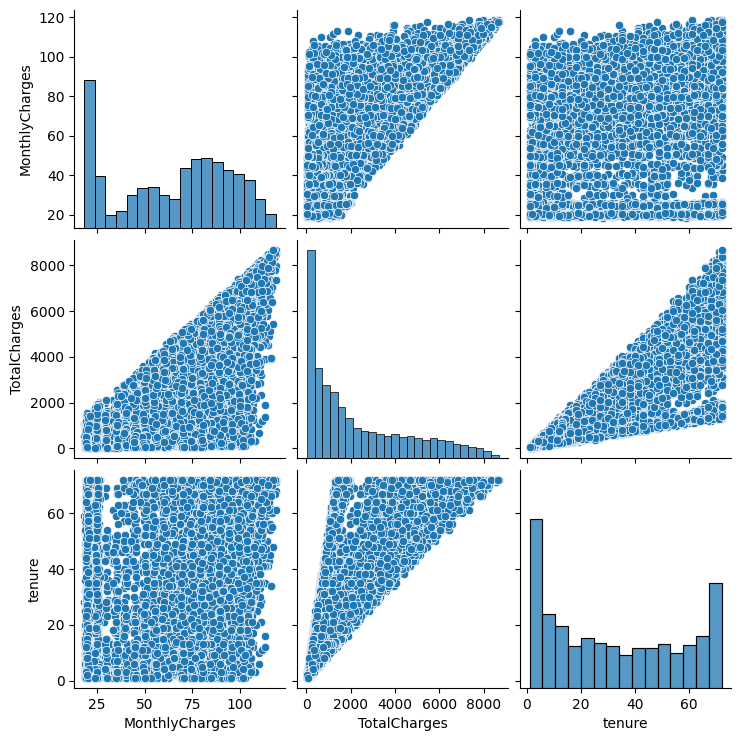

In [176]:
sns.pairplot(df[["MonthlyCharges", "TotalCharges", "tenure"]]);

The relationship between the continuos variables are not very clear, we can note that:
- as the MonthCharges increases, the TotalCharges seem to increase (even though there are some clients where this is not true)
- no clear realtion between MonthlyCharges and tenure
- as the Total Charges increases, the tenure increases (even in here it's confusing, for some clients this is not true)

## 4) DATA PREPARATION FOR MODELLING

#### 4.1) DUMMY TRANSFORMATION

Because most of the variables are categoric, we need to trasform them into dummies. In order to do it properly, we need to look at the characteristics and nature of singular variables.

In [177]:
#definition of x
X = df.drop(["Churn", "customerID"], axis=1)

In [178]:
#definition of y
y =[]
for i in df.Churn:
    if i == "Yes":
        y.append(1)
    else:
        y.append(0)

In [179]:
object_cols = [col for col in X.columns if X[col].dtype=="object"]
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [180]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('gender', 2),
 ('Partner', 2),
 ('Dependents', 2),
 ('PhoneService', 2),
 ('PaperlessBilling', 2),
 ('MultipleLines', 3),
 ('InternetService', 3),
 ('OnlineSecurity', 3),
 ('OnlineBackup', 3),
 ('DeviceProtection', 3),
 ('TechSupport', 3),
 ('StreamingTV', 3),
 ('StreamingMovies', 3),
 ('Contract', 3),
 ('PaymentMethod', 4)]

From here we can see that:
- Gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn are all dicotomic, and can be trasnformed easily in 0/1 dummies
- The variables with 3 unique values and PaymentMethod are not ordinal variables, so we need to use hot_encoding: we have to create new columns as the categories, using the function pd_get_dummies. The only one which can be ordered is maybe Contract, but for simplicity we use the same method for all categorical variables

In [181]:
two_values_cols = []
for col in X.columns:
    if X[col].nunique()==2:
        two_values_cols.append(col)
        
two_values_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling']

In [182]:
two_values_cols.remove("SeniorCitizen")
#I remove SeniorCitizen because it's already converted to a dummy

In [183]:
#ora le dummy con 2 modalità le trasformo con la stessa variabile
X = pd.get_dummies(X, drop_first=True, columns=two_values_cols)
X.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,0,1,0,0,1
1,0,34,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.50,1,0,0,1,0
2,0,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,1,0,0,1,1
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,1,0,0,0,0
4,0,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,0,0,0,1,1


In [184]:
other_dummies = list(set(object_cols)-set(two_values_cols))

In [185]:
X = pd.get_dummies(X, columns=other_dummies)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Contract_Month-to-month,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,2,53.85,108.15,1,0,0,1,1,1,...,0,0,0,1,0,0,1,1,0,0
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,0,2,70.70,151.65,0,0,0,1,1,1,...,0,0,1,0,1,0,0,0,1,0


In conclusion, we have prepared the y and the X for the modelling. For the X we have 40 columns.

Now, we have to split into train and test set, and scale the quantitative variables.

#### 4.2) TRAIN TEST SPLITTING

In splitting, I decide to put 80% of units in the training set, and the remaining 20% in the test set, where we will check the performances of the different models.

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)
print("Train<<<<<", "len:", len(X_train), len(y_train))
print("Test<<<<<", "len:", len(X_test), len(y_test))

Train<<<<< len: 5625 5625
Test<<<<< len: 1407 1407


#### 4.3) SCALING

In this case, because we have mostly dummy variables, i want to convert the quantitative variables in the range [0,1], so that the different models are not affected by the units of measurement of the quantitative predictors.

In [187]:
quantitative_vars = [col for col in X.columns if X[col].dtype == "int64" or X[col].dtype == "float64"]
quantitative_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [188]:
quantitative_vars.remove("SeniorCitizen")

Since the distributions of the quantitative variables are not normal and since they do not have any outliers, I choose the MinMax Scaler.

In [189]:
from sklearn.preprocessing import MinMaxScaler
minmax_scal = MinMaxScaler()
X_train[quantitative_vars] = minmax_scal.fit_transform(X_train[quantitative_vars])
X_test[quantitative_vars] = minmax_scal.transform(X_test[quantitative_vars])
X_train[quantitative_vars].head()

,tenure,MonthlyCharges,TotalCharges
2964,0.323944,0.399005,0.153254
5113,0.985915,0.949254,0.940226
5363,0.971831,0.070647,0.195748
5074,0.676056,0.011940,0.104143
156,0.295775,0.655721,0.208072


## 5) CLASSIFICATION MODELS

This is a classification case, so we will use:
- Logistic Regression
- Linear/Quadratic Discriminant Analysis
- Naive Bayes
- Random Forest Classifier
- Support Vector

#### 5.1) LOGISTIC REGRESSION

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_logi = log_reg.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_logi)
acc_log

0.8031272210376688

So, accuracy is at 80.3%.

In [191]:
print(log_reg.coef_[0])

[ 0.26395864 -3.26707819 -0.15044082  1.2903316   0.02152203  0.03027916
 -0.20891618 -0.13963608  0.36299171  0.68386612  0.01823771 -0.70866346
  0.21832823 -0.09901664 -0.12587123 -0.20618267  0.13307644  0.06654659
 -0.09319289 -0.09901664  0.18564989  0.1228705  -0.09901664 -0.0304135
 -0.04575413 -0.09901664  0.13821113  0.0067416  -0.09901664  0.0857154
 -0.02946462 -0.21532437  0.32002031 -0.08179096  0.20082532 -0.09901664
 -0.10836832 -0.37206967  0.46452667 -0.09901664]


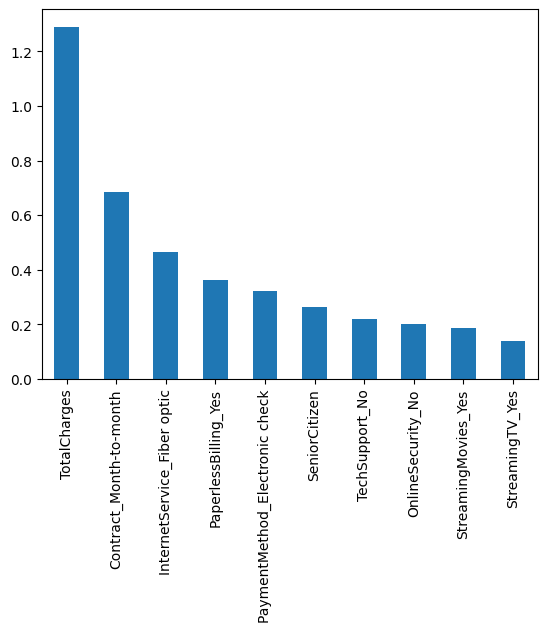

In [192]:
weights = pd.Series(log_reg.coef_[0], index = X_train.columns.values)
#see the most important 10 with positive coefficients
weights.sort_values(ascending=False)[:10].plot(kind="bar");

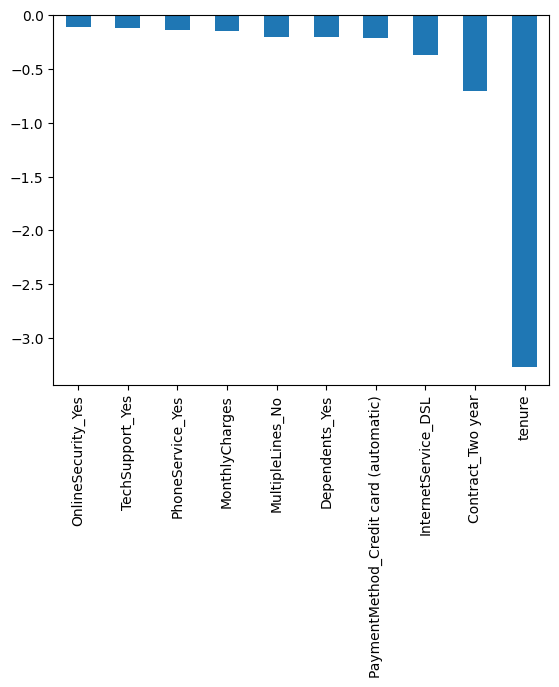

In [193]:
#for the negative coefficients
weights.sort_values(ascending=False)[-10:].plot(kind="bar");

Positive coefficients are the ones that increase the probability of churning, the negative decreases it.
Even though the coefficients of logistic regression cannot be interpreted as the ones of linear regression, their values is an index of the effect of a variable for the churn. From here, we can note that:
- TotalCharges, Month-to-month contracts and Fiber opting are the 3 variables that most increases the probability of churning. Now, if for TotalCharges and month contracts this has sense, because higher prices paid and month contracts makes it easier for a client to churn, for FiberOpting this is unexpected. So there means that are some problems with it that makes the users leave.
- On the other hand, the variables that decrease the churn possibility are tenure (the more a client stay, the less is probable that it leaves), Two years Contract (as we have defined before), and DSL service. Seeing this last variable, we can observe that maybe the DSL service is on par or better in respect to the competition.

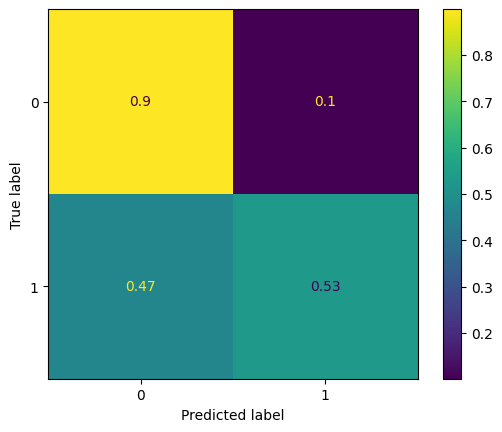

In [194]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_log = confusion_matrix(y_test, y_pred_logi)
#normalise the confusion matrix
cm_log = cm_log.astype('float') / cm_log.sum(axis=1)[:, np.newaxis]
ConfusionMatrixDisplay(cm_log, display_labels= [0, 1]).plot();

From here, you can see that the model has some difficulties in predicting when the churn is true. As a matter of fact, when the churn = 1, 47% of times the predictions were off, while when churn = 0, the predictions were wrong only 10% of the times. This is probably because of unbalanced data.

<b>When dealing with an imbalanced class problem, it is generally better to use F1 score instead of accuracy</b>

Accuracy is a measure of how many predictions were correct out of the total number of predictions made. However, in an imbalanced dataset where the number of instances of one class is much larger than the other, accuracy can be misleading because it will give high scores to models that predict the majority class most of the time, even if it performs poorly on the minority class.

F1 score, on the other hand, is a weighted average of precision and recall. It takes into account both false positives and false negatives and provides a more balanced evaluation metric for imbalanced datasets. The F1 score is particularly useful when we want to optimize the performance of the classifier on the minority class.

In summary, accuracy can be useful when the dataset is balanced, but in imbalanced datasets, F1 score is generally a better metric to use for evaluating the performance of a classification model.

In [195]:
from sklearn.metrics import f1_score
f1_log = f1_score(y_test, y_pred_logi)
f1_log

0.587183308494784

As a matter of fact, the F1 score is only 58,7%

One possible solution of this problem may be setting the parameter class_weigth of the LogisticRegression function to "balanced". The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

In [197]:
log_reg_bal = LogisticRegression(class_weight="balanced")
log_reg_bal.fit(X_train, y_train)

y_pred_logi_bal = log_reg_bal.predict(X_test)

acc_log_bal = accuracy_score(y_test, y_pred_logi_bal)
f1_log_bal = f1_score(y_test, y_pred_logi_bal)
print("The accuracy score is", acc_log_bal)
print("The F1 score is", f1_log_bal)

The accuracy score is 0.7491115849324804
The F1 score is 0.6272439281942978


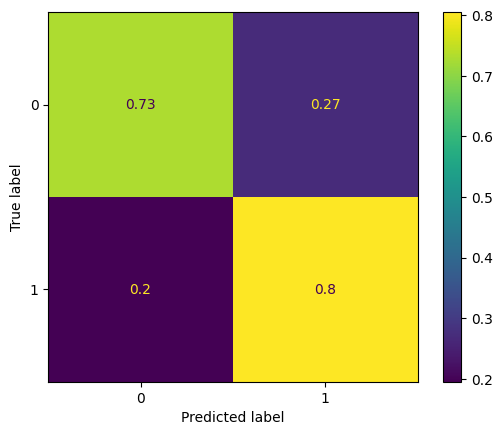

In [198]:
cm_log_bal = confusion_matrix(y_test, y_pred_logi_bal)
cm_log_bal = cm_log_bal.astype('float') / cm_log_bal.sum(axis=1)[:, np.newaxis]
ConfusionMatrixDisplay(cm_log_bal, display_labels= [0, 1]).plot();

Using the parameter balanced, the F1 increases to 62,7%, but the accuracy decreases to 75%. However in this case, the predicted 0 while the churn was 1 were only 20% (vs the previous 47%), while the predicted clients to churn where in reality they remained are the 27% (for the previous model it was 10%).

To sum up, this second model is doing a better job at correctly predicting the minority class while sacrificing some accuracy on the majority class.
<br> The choice of which model is better depends on the business and monetary value associated with the different errors: in this case I think that it's worse to predict that a customer will not leave when in fact he/she will, than to erroneously predict that one will leave when in fact he/she stays.

#### 5.2) NAIVE-BAYES

In [199]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

bnb = BernoulliNB()

bnb.fit(X_train, y_train)

y_pred_bnb = bnb.predict(X_test)

print("The accuracy score is", accuracy_score(y_test,y_pred_bnb))
print("The F1 score is", f1_score(y_test,y_pred_bnb))

The accuracy score is 0.7228144989339019
The F1 score is 0.6060606060606061


With Bernoulli Naive Bayes, the accuracy score and the f1 score are smaller than the ones of the logistic regression with balanced class weights, so i will not consider it.

#### 5.3) RANDOM FOREST CLASSIFIER

In [200]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight="balanced")
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

print("The accuracy score is", accuracy_score(y_test,y_pred_rfc))
print("The F1 score is", f1_score(y_test,y_pred_rfc))

The accuracy score is 0.7917555081734187
The F1 score is 0.5499231950844854


#### 5.4) SUPPORT VECTOR MACHINE

In [201]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

print("The accuracy score is", accuracy_score(y_test,y_pred_svc))
print("The F1 score is", f1_score(y_test,y_pred_svc))

The accuracy score is 0.8024164889836531
The F1 score is 0.5642633228840126


## 6) CHOICE OF THE MODEL AND FEATURE SELECTION

From the results obtained, we can conclude that the best model is the Logistic regression with balanced class weight.

Now, I look at the correlation between the different predictors, in order to check for multicollinearity.

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif.sort_values(by="VIF Factor", ascending=False))

/Users/daniele/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


    VIF Factor                                 features
20         inf                      StreamingMovies_Yes
30         inf  PaymentMethod_Bank transfer (automatic)
23         inf                         OnlineBackup_Yes
24         inf                           StreamingTV_No
25         inf          StreamingTV_No internet service
26         inf                          StreamingTV_Yes
27         inf                      DeviceProtection_No
28         inf     DeviceProtection_No internet service
29         inf                     DeviceProtection_Yes
31         inf    PaymentMethod_Credit card (automatic)
21         inf                          OnlineBackup_No
32         inf           PaymentMethod_Electronic check
33         inf               PaymentMethod_Mailed check
34         inf                        OnlineSecurity_No
35         inf       OnlineSecurity_No internet service
36         inf                       OnlineSecurity_Yes
37         inf                      InternetServ

So, from here we can see that the correlation is pretty high between the different variables, maybe in order to improve we need to remove some variables.

#### FEATURE SELECTION

To solve this, we can try a lasso regression, adding 'l1' penalty and using a low value of C in the Logistic Regression function.

In [203]:
log_lasso = LogisticRegression(class_weight="balanced",penalty='l1',solver="liblinear", C = 0.5)

log_lasso.fit(X_train, y_train)

y_pred_lasso = log_lasso.predict(X_test)

print("The accuracy score is", accuracy_score(y_test,y_pred_lasso))
print("The F1 score is", f1_score(y_test,y_pred_lasso))

The accuracy score is 0.746268656716418
The F1 score is 0.6246056782334385


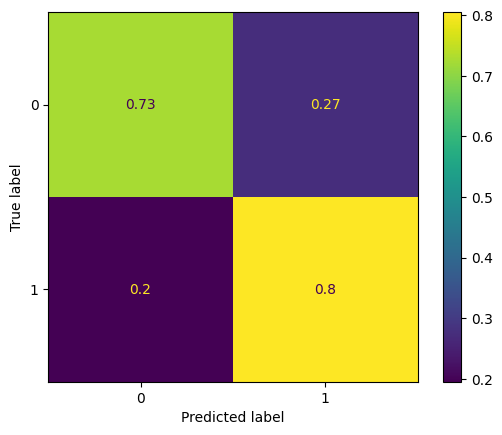

In [204]:
cm_log_lasso = confusion_matrix(y_test, y_pred_lasso)
cm_log_lasso = cm_log_lasso.astype('float') / cm_log_lasso.sum(axis=1)[:, np.newaxis]
ConfusionMatrixDisplay(cm_log_lasso, display_labels= [0, 1]).plot();

Using Lasso regression, the improvement is really small.

I will try to use Recursive Feature Elimination (RFE). RFE is a popular feature selection method that works by recursively removing features and building a model using the remaining features. It ranks the features based on their importance and selects the top-k features that provide the best performance.

In [205]:
from sklearn.feature_selection import RFE

selector = RFE(log_reg_bal,n_features_to_select=10, step=1)

# Fit the selector on the data
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]

In [206]:
selected_features

Index(['tenure', 'TotalCharges', 'PhoneService_Yes', 'PaperlessBilling_Yes',
       'Contract_Month-to-month', 'Contract_Two year', 'TechSupport_No',
       'PaymentMethod_Electronic check', 'OnlineSecurity_No',
       'InternetService_Fiber optic'],
      dtype='object')

In [207]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train[selected_features].values, i) 
                     for i in range(X_train[selected_features].shape[1])]
vif["features"] = X_train[selected_features].columns
print(vif.sort_values(by="VIF Factor", ascending=False))

   VIF Factor                        features
0   12.061857                          tenure
1    9.984218                    TotalCharges
2    5.937420                PhoneService_Yes
4    4.112972         Contract_Month-to-month
9    3.896540     InternetService_Fiber optic
6    2.988171                  TechSupport_No
8    2.936528               OnlineSecurity_No
3    2.851617            PaperlessBilling_Yes
5    2.360852               Contract_Two year
7    1.941806  PaymentMethod_Electronic check


In [208]:
log_reg_bal.fit(X_train[selected_features],y_train)

pred = log_reg_bal.predict(X_test[selected_features])

f1_score(y_test, pred)

print("The accuracy score is", accuracy_score(y_test,pred))
print("The F1 score is", f1_score(y_test,pred))

The accuracy score is 0.7412935323383084
The F1 score is 0.6200417536534447


Even in here the accuracy and the F1 score didn't improve much.

## CONCLUSION AND LIMITS OF THE PROJECTS

At the end, the final model I choose is the Logistic Regression with balanced class weigths. From that model we get an accuracy of 75% and an F1-score of 62%.

This project was really interesting, because it allowed me to analyse an important metric of the business world: the churn rate. I observed the relationship between different variables, and i tried to fit a model which can deal with unbalanced class. Now, the model is not perfect, and possible ways to improve the performances of the models may be, for example:
- use other resampling techniques, like oversampling, undersampling and SMOTE;
- try different values of the parameter of the different models function

However, for the goal of my analysis, i did not want to get too long on the matter.

In conclusion, I am satisfied about this project, and if you, who are reading, have any doubts feel free to contact me!